<a href="https://colab.research.google.com/github/boazgajja/-Realtime-Ecommerce-Data-Pipeline-Analaytics-Dashboard/blob/main/lda_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


LDA Model Accuracy: 1.0
LDA Model Precision: 1.0
LDA Model Recall: 1.0

Confusion Matrix:
 [[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



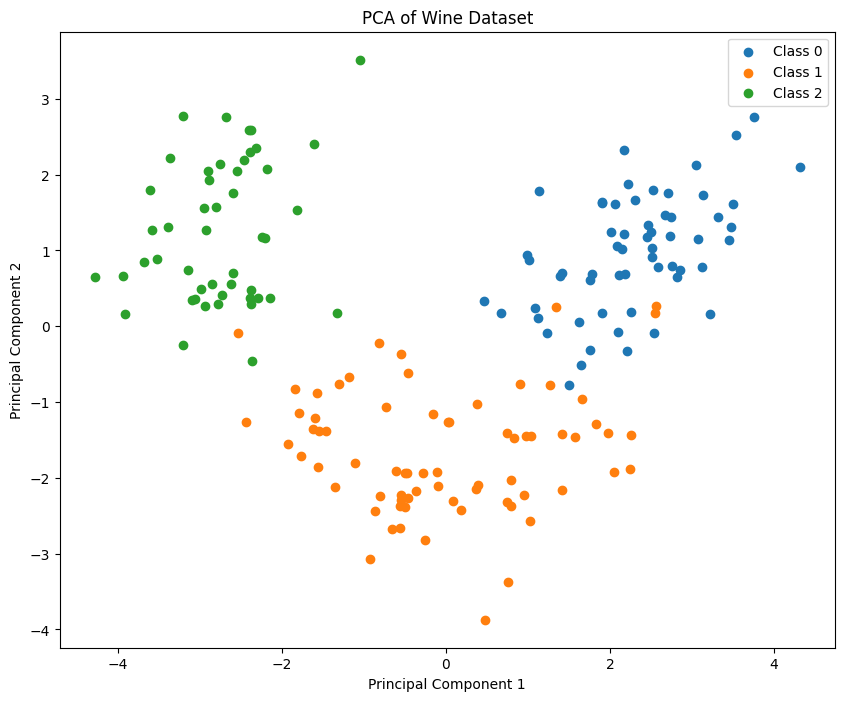

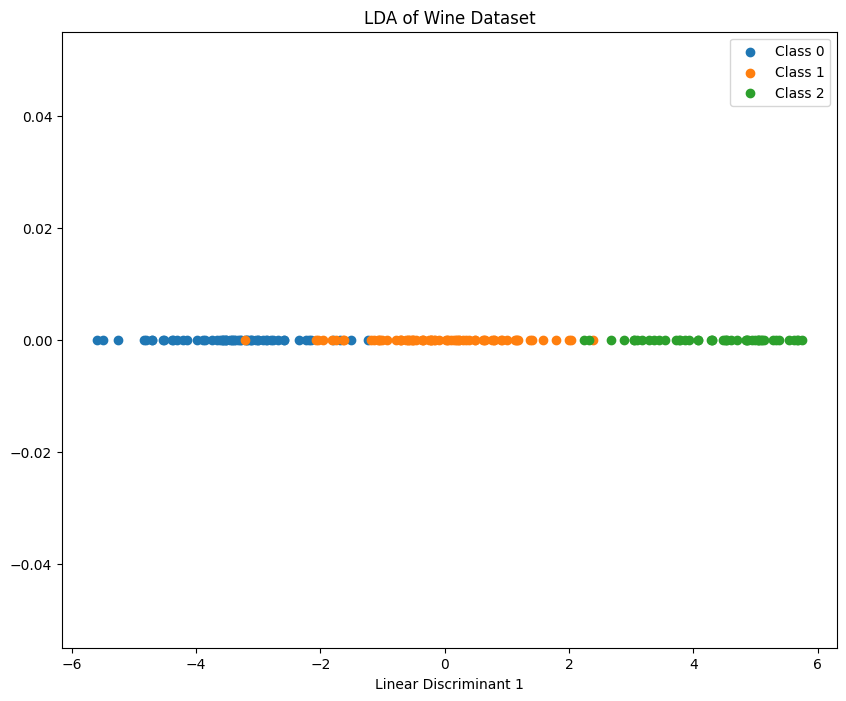

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Step 1: Load the Wine dataset from sklearn
wine_dataset = datasets.load_wine()
wine_features = wine_dataset.data
wine_target = wine_dataset.target

# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(wine_features)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(standardized_features, wine_target, test_size=0.3, random_state=42)

# Step 3: Train the LDA model as a classifier
lda_classifier = LDA()
lda_classifier.fit(X_train, y_train)

# Step 4: Make predictions and evaluate LDA model
lda_predictions = lda_classifier.predict(X_test)
print("LDA Model Accuracy:", accuracy_score(y_test, lda_predictions))
print("LDA Model Precision:", precision_score(y_test, lda_predictions, average='weighted'))
print("LDA Model Recall:", recall_score(y_test, lda_predictions, average='weighted'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, lda_predictions))
print("\nClassification Report:\n", classification_report(y_test, lda_predictions))

# Step 5: Apply PCA and plot the results
pca_model = PCA(n_components=2)
pca_transformed = pca_model.fit_transform(standardized_features)

plt.figure(figsize=(10, 8))
for class_label in np.unique(wine_target):
    plt.scatter(pca_transformed[wine_target == class_label, 0],
                pca_transformed[wine_target == class_label, 1], label=f'Class {class_label}')
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Step 6: Apply LDA for dimensionality reduction and plot results
lda_reducer = LDA(n_components=2)
lda_transformed = lda_reducer.fit_transform(standardized_features, wine_target)

plt.figure(figsize=(10, 8))
for class_label in np.unique(wine_target):
    plt.scatter(lda_transformed[wine_target == class_label, 0],
                np.zeros_like(lda_transformed[wine_target == class_label, 0]), label=f'Class {class_label}')
plt.title('LDA of Wine Dataset')
plt.xlabel('Linear Discriminant 1')
plt.legend()
plt.show()
